In [1]:
%%html
<style>
/*overwrite hard coded write background by vscode for ipywidges */
.cell-output-ipywidget-background {
background-color: transparent !important;
}
/*set widget foreground text and color of interactive widget to vs dark theme color */
:root {
--jp-widgets-color: var(--vscode-editor-foreground);
--jp-widgets-font-size: var(--vscode-editor-font-size);
}
</style>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.signal import find_peaks, peak_widths

In [36]:
# sheets importieren
sheet_names = [
    "Na22",
    "Cs",
    "Co",
    "Schutz",
    "Nackt",
    "K2CO3",
    "Melke die Molke",
    "Uranoxid",
    "Thor",
    "Pilze nur Pilze",
]
sheets = [pd.read_excel("RAD.xlsx", sheet_name=name) for name in sheet_names]
sheets = (
    pd.concat(dict(zip(sheet_names, sheets)))
    .drop(columns=["n_A#2", "N_A#2", "n_A#3", "N_A#3"])
    .rename(columns={"n_A": "Channel", "N_A": "Events"})
    .reset_index()
    .set_index(["level_0", "Channel"])
    .drop(columns="level_1")
)
sheets

Events
level_0         Channel        
Na22            0             6
                1            14
                2             9
                3             7
                4             3
...                         ...
Pilze nur Pilze 1019          0
                1020          0
                1021          0
                1022          0
                1023        984

[10240 rows x 1 columns]

## Natrium Kalibrierkurve

,Channel,Events,Width
Channel,,,
8,8,225,4.927083
30,30,464,4.102645
71,71,530,75.471480
186,186,900,16.705539
446,446,164,23.813492


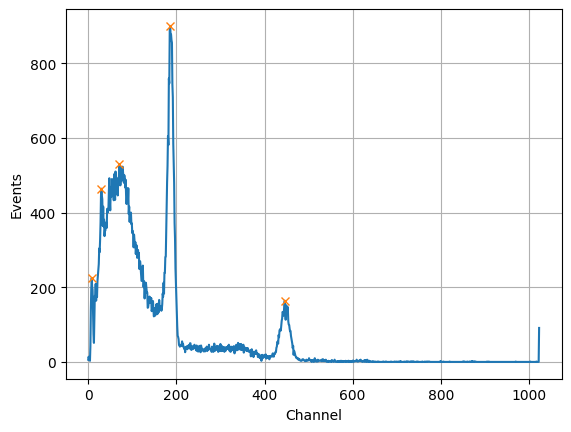

In [145]:
series = "Na22"

def get_peaks(series, prominence=100):
    # peaks finden
    peaks = find_peaks(sheets.loc[series, "Events"], prominence=prominence)[0]
    # unsicherheiten bestimmen
    widths = peak_widths(sheets.loc[series, "Events"], peaks)[0]
    peaks = pd.DataFrame(
        {
            "Channel": peaks,
            "Events": sheets.loc[series, "Events"].iloc[peaks],
            "Width": widths,
        }
    )
    return peaks

def peak_plot(series, peaks):
    plt.plot(sheets.loc[series, "Events"])
    plt.plot(peaks["Channel"], peaks["Events"], "x")
    plt.grid(True)
    plt.xlabel("Channel")
    plt.ylabel("Events")

peaks = get_peaks("Na22")
peak_plot("Na22", peaks)
peaks

,Channel,Events,Width,Energy
Channel,,,,
71,71,530,75.471480,511
186,186,900,16.705539,1275
446,446,164,23.813492,1787


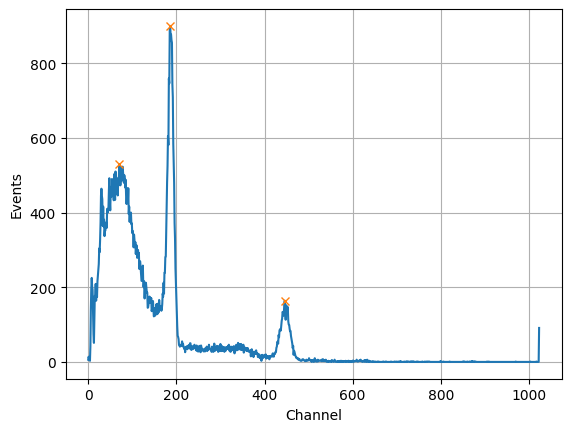

In [146]:
na_peaks = peaks.drop(index=[8, 30])
na_peaks["Energy"] = [511, 1275, 1787]
peak_plot("Na22", na_peaks)
na_peaks

,Channel,Events,Width
Channel,,,
9,9,37,5.018750
34,34,105,12.608696
55,55,114,61.866667
59,59,100,6.074561
413,413,30,7.644231
466,466,28,2.788194


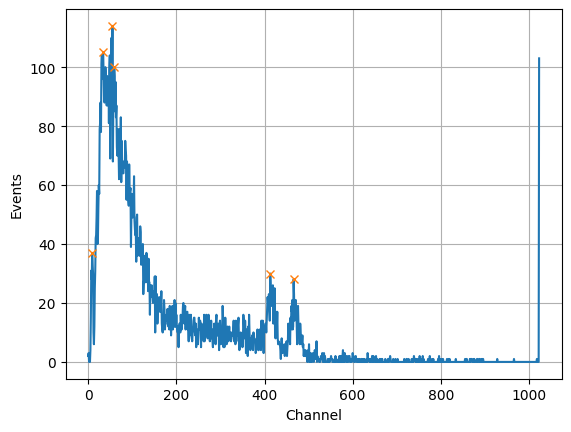

In [150]:
peaks = get_peaks("Co", prominence=25)
peak_plot("Co", peaks)
peaks

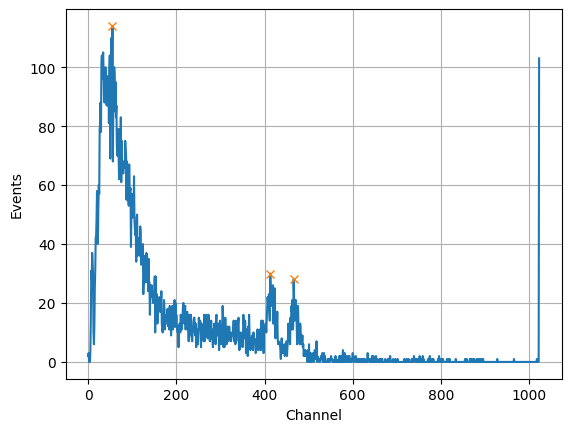

In [155]:
co_peaks = peaks.drop(index=[9, 34, 59])
co_peaks["Energy"] = [1173, 1333, 2506]
peak_plot("Co", co_peaks)

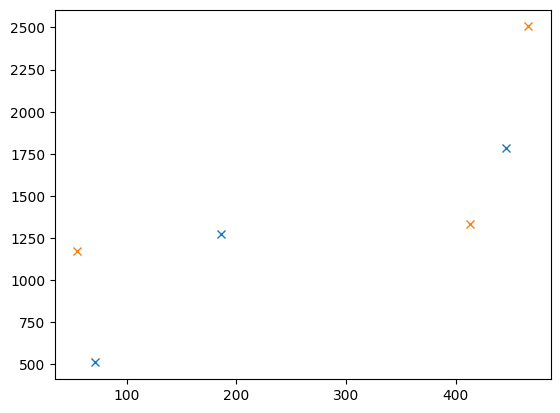

In [156]:
plt.plot(na_peaks["Channel"], na_peaks["Energy"], "x")
plt.plot(co_peaks["Channel"], co_peaks["Energy"], "x")